In [4]:
from neuralprophet import NeuralProphet
import pandas as pd

df = pd.read_csv("../Datasets/compare_prophet.csv")

In [5]:
#df['ds']

In [8]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")

from utils.read_dataset import ReadDatasets
import numpy as np

dir_data = '../Datasets/sintetic_data/test_compressor_data.h5'

y_periodic = np.array(ReadDatasets.read_h5(dir_data))
x_time = pd.date_range("2018-01-01", periods=len(y_periodic),freq="H")

df = pd.DataFrame({'ds':x_time, 'y':y_periodic})

In [9]:
m = NeuralProphet()

metrics = m.fit(df)

WARN - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 70


Finding best initial lr:   0%|          | 0/266 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [10]:
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 704it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [11]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2018-01-01 00:00:00,1.237781,-8.046614,1.125670,-9.191897,-0.078753,0.098367
1,2018-01-01 01:00:00,0.423929,-7.984993,1.113750,-9.145556,-0.075263,0.122076
2,2018-01-01 02:00:00,0.993729,-7.987047,1.101830,-9.099292,-0.072207,0.082622
3,2018-01-01 03:00:00,-1.852604,-8.022669,1.089911,-9.053097,-0.069656,0.010174
4,2018-01-01 04:00:00,0.180438,-7.982837,1.077991,-9.006975,-0.067676,0.013823
...,...,...,...,...,...,...,...
44995,2023-02-18 19:00:00,120.966095,171.836044,160.051361,11.940399,-0.051280,-0.104423
44996,2023-02-18 20:00:00,121.286013,171.835449,160.061005,11.965762,-0.060624,-0.130698
44997,2023-02-18 21:00:00,120.412958,171.934006,160.070679,11.991155,-0.069566,-0.058260
44998,2023-02-18 22:00:00,120.068122,172.052917,160.080368,12.016576,-0.078036,0.034015


WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


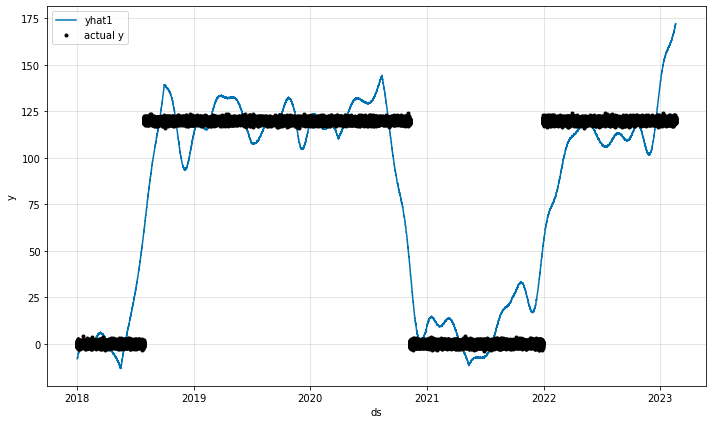

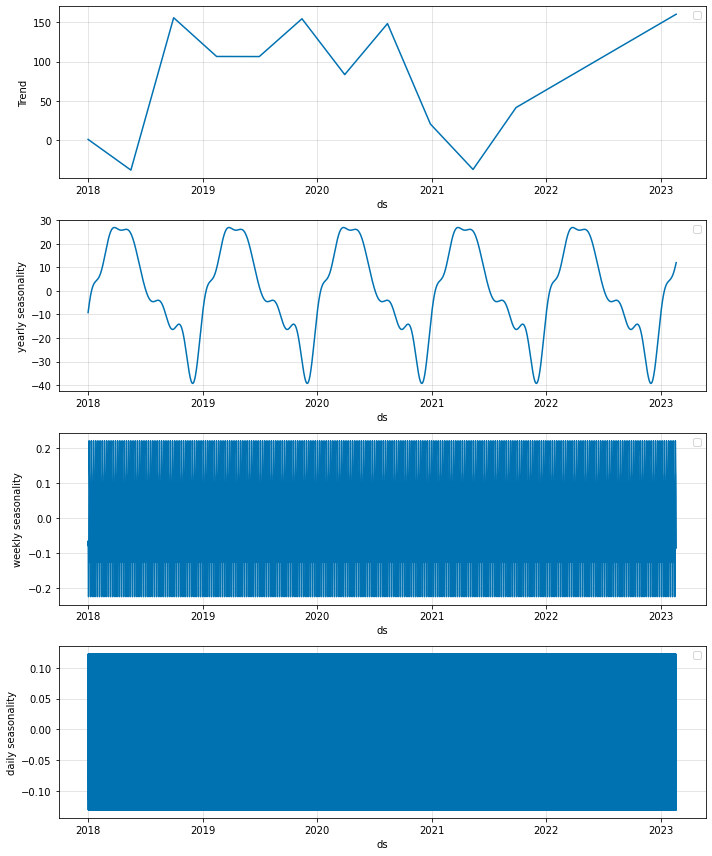

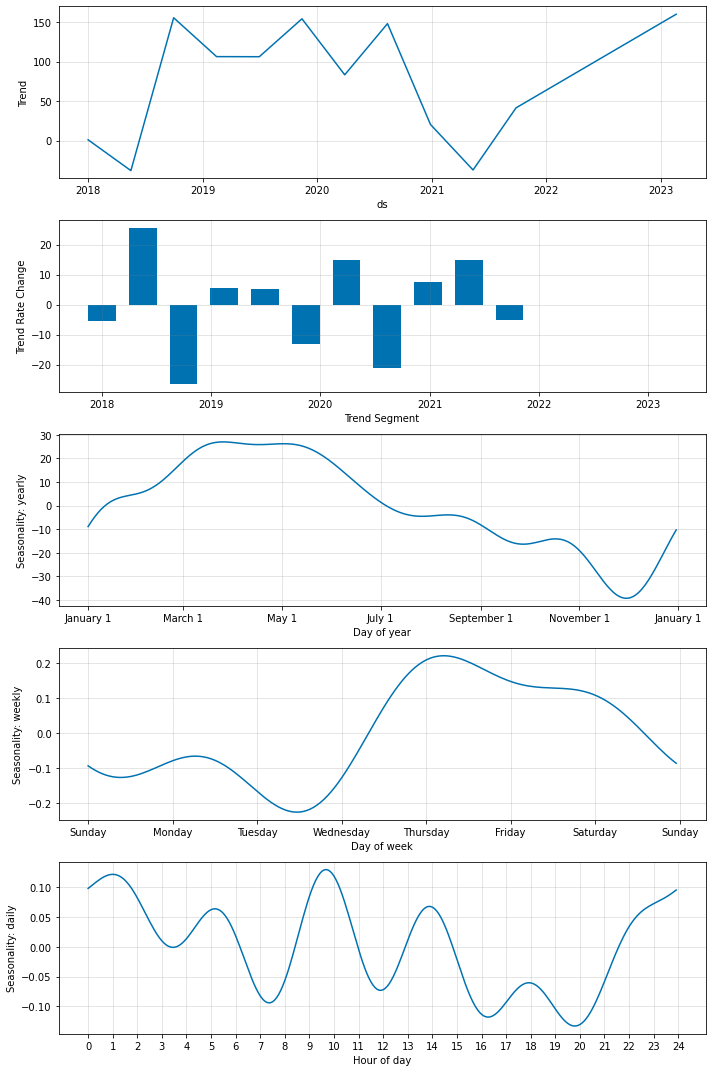

In [12]:
#m.set_plotting_backend('plotly')
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()